In [24]:
from bs4 import BeautifulSoup 
import urllib

In [25]:
url = 'http://www.powerball.com/powerball/pb_nbr_history.asp?startDate=7%2F29%2F2016&endDate=10%2F7%2F2015'

In [26]:
page = urllib.urlopen(url).read()

In [27]:
soup = BeautifulSoup(page)

In [28]:
tags = soup.find_all("tr", {"valign": "middle"})

In [29]:
all_draws = []
for draw in tags:
    each_draw = []
    date = str(draw.td.b.string)
    each_draw.append(date)
     
    num_tag = draw.find_all('td')
    for i in range(1,6):  # skip the first 'td' element which represents date
        num = int(num_tag[i].string)
        each_draw.append(num)
    each_draw.append(int(num_tag[7].string))
    
    all_draws.append(each_draw)

print all_draws[:10]


[['7/27/2016', 10, 47, 50, 65, 68, 24], ['7/23/2016', 5, 7, 23, 35, 39, 11], ['7/20/2016', 6, 25, 35, 58, 66, 5], ['7/16/2016', 11, 17, 40, 50, 62, 26], ['7/13/2016', 3, 15, 29, 54, 57, 10], ['7/9/2016', 10, 28, 32, 61, 64, 12], ['7/6/2016', 2, 24, 31, 57, 66, 18], ['7/2/2016', 10, 34, 39, 59, 63, 4], ['6/29/2016', 23, 29, 37, 60, 64, 6], ['6/25/2016', 3, 27, 36, 56, 69, 25]]


In [30]:
all_draws[-1]

['10/7/2015', 18, 30, 40, 48, 52, 9]

In [31]:
import csv

In [32]:
cd "C:\Users\Zhenning\Desktop\Code\practice"

[Error 3] The system cannot find the path specified: u'C:/Users/Zhenning/Desktop/Code/practice'
C:\Users\Zhenning\Documents\Code\practice


In [33]:
headers = ["date", "n1", "n2", "n3", "n4", "n5", "red"]
with open("powerball_history_period.csv", 'wb') as f:
    output = csv.writer(f, delimiter = ',') 
    output.writerow(headers)
    for draw in all_draws:
        output.writerow(draw)

print "done writing file"

done writing file


In [34]:
import matplotlib.pyplot as plt
%matplotlib inline  

In [35]:
sum_white_ball = [sum(i[1:-1]) for i in all_draws]

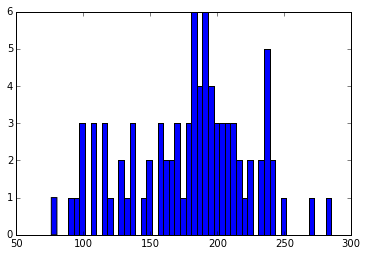

In [36]:
plt.hist(sum_white_ball, 50)
plt.show()

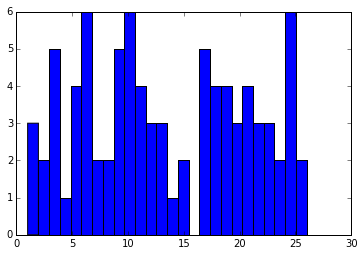

In [39]:
red_ball = [i[-1] for i in all_draws]  # all red ball number
plt.hist(red_ball, bins = 26)
plt.show()

In [38]:
len(red_ball)

85